In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene


#Se Cargan los datasets O Importan
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
df_drops = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')




In [293]:
#Se imprimen las primeras filas 

print(df_trips.head())

print(df_drops.head())

print(df_weather.head())



                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [294]:
# Verificar tipos de datos 
print(df_trips.dtypes)
print(df_drops.dtypes)
print(df_weather.dtypes)

# Verificar si hay valores nulos en df_trips
null_values_trips = df_trips.isnull().sum()
print("Valores nulos en df_trips:")
print(null_values_trips)

# Verificar si hay valores nulos en df_drops
null_values_drops = df_drops.isnull().sum()
print("\nValores nulos en df_drops:")
print(null_values_drops)

# Verificar si hay valores nulos en df_weather
null_values_weather = df_weather.isnull().sum()
print("\nValores nulos en df_weather:")
print(null_values_weather)




company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object
Valores nulos en df_trips:
company_name    0
trips_amount    0
dtype: int64

Valores nulos en df_drops:
dropoff_location_name    0
average_trips            0
dtype: int64

Valores nulos en df_weather:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [295]:
# Se Verifica duplicados en df_trips
duplicates_trips = df_trips.duplicated().sum()
print(f"Duplicados en df_trips: {duplicates_trips}")

#Se Verifica duplicados en df_drops
duplicates_drops = df_drops.duplicated().sum()
print(f"Duplicados en df_drops: {duplicates_drops}")

#Se Verifica duplicados en df_weather
duplicates_weather = df_weather.duplicated().sum()
print(f"Duplicados en df_weather: {duplicates_weather}")


Duplicados en df_trips: 0
Duplicados en df_drops: 0
Duplicados en df_weather: 197


Se encuentran valores duplicados!!! se deben de eliminar

In [296]:
# Se Verifica que no se encuentren duplcados
df_trips = df_trips.drop_duplicates()
df_drops = df_drops.drop_duplicates()
df_weather = df_weather.drop_duplicates()


#Se eliminaron los duplicados

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar si contamos con registros duplicados</div>



In [297]:
# Ordenar y seleccionar los 10 barrios con más viajes
top_10_drops = df_drops.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_drops[['dropoff_location_name', 'average_trips']])


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


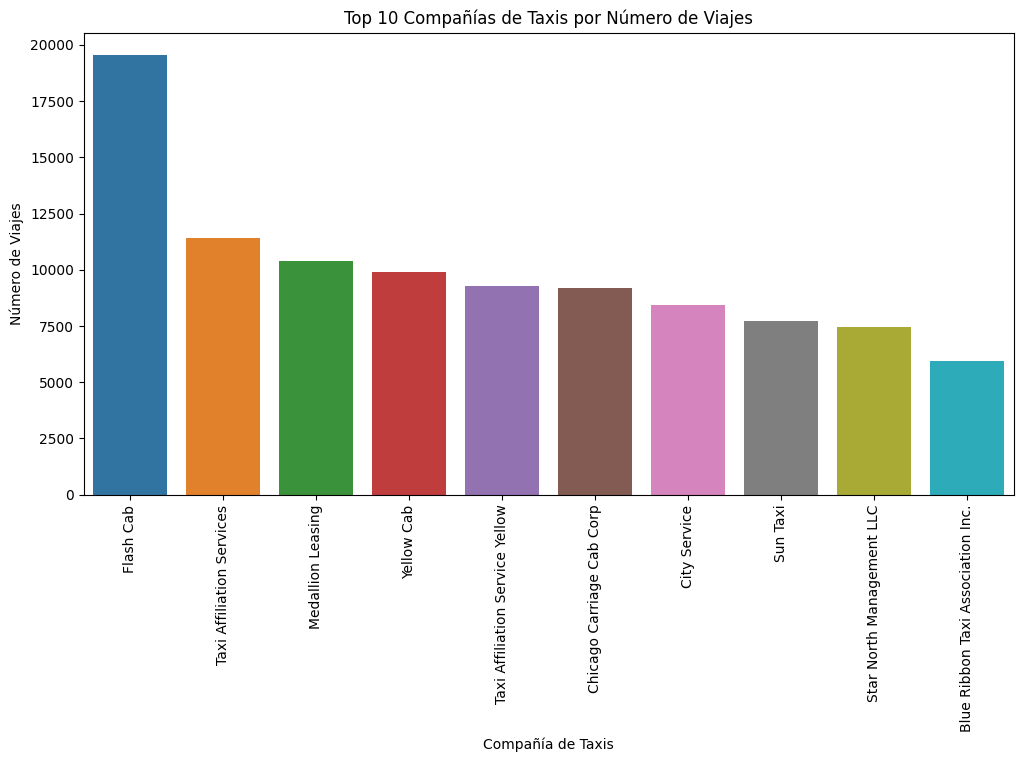

In [298]:
# Se Ordena el dataframe por el número de viajes (trips_amount) de forma descendente y se selecciona el top 10
top_10_trips = df_trips.sort_values(by='trips_amount', ascending=False).head(10)

# Crear la gráfica de barras para el top 10 de empresas de taxis
plt.figure(figsize=(12, 6))
sns.barplot(x='company_name', y='trips_amount', data=top_10_trips)
plt.xticks(rotation=90)
plt.title('Top 10 Compañías de Taxis por Número de Viajes')
plt.xlabel('Compañía de Taxis')
plt.ylabel('Número de Viajes')
plt.show()


#SE PUEDE VER UNA VARIABLES SIGNIFCATIVOS EN EL NUMERO DE VIAJES REALLZADOS POR COMPANIA .

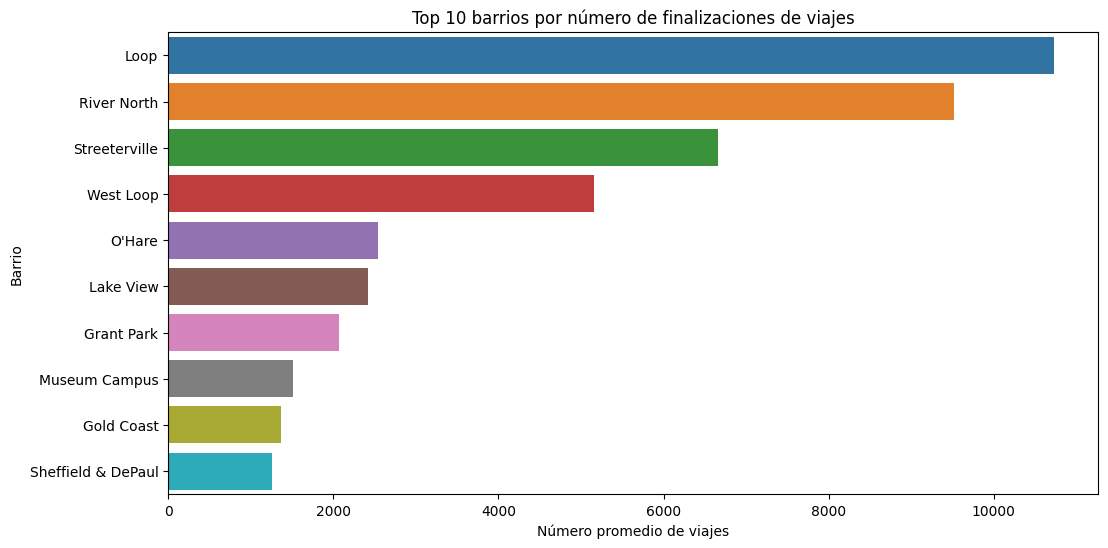

In [299]:

2 # Gráfico: los 10 barrios principales por número de finalizaciones
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_drops)
plt.title('Top 10 barrios por número de finalizaciones de viajes')
plt.xlabel('Número promedio de viajes')
plt.ylabel('Barrio')
plt.show()


SE MUESTRA LOS 10 LUGARES DONDE LOS PASAJEROS SUELEN FINALIZAR MAS SUS VIAJES 

In [307]:
# Convertir la columna 'start_ts' a formato datetime 
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])

# Se Crea una columna con el dia de la semana
df_weather['day_of_week'] = df_weather['start_ts'].dt.dayofweek  # 0 = lunes, 5 = sábado

#Sev Crea una columna que clasifique como lluvioso o no lluvioso
df_weather['is_rainy'] = df_weather['weather_conditions'] == 'Bad'  # Consideramos 'Bad' como lluvioso

# Se Crea una columna para identificar los sábados
df_weather['is_saturday'] = df_weather['day_of_week'] == 5  # 5 = sábado

#Se Filtran los sabados lluviosos y no lluviosos
saturday_rainy = df_weather[(df_weather['is_saturday']) & (df_weather['is_rainy'])]
saturday_clear = df_weather[(df_weather['is_saturday']) & (~df_weather['is_rainy'])]

# Se Verifican los datos
print(saturday_rainy.head())
print(saturday_clear.head())


              start_ts weather_conditions  duration_seconds  day_of_week  \
6  2017-11-04 16:00:00                Bad            2969.0            5   
30 2017-11-18 12:00:00                Bad            1980.0            5   
34 2017-11-04 17:00:00                Bad            2460.0            5   
51 2017-11-04 16:00:00                Bad            2760.0            5   
52 2017-11-18 12:00:00                Bad            2460.0            5   

    is_rainy  is_saturday  
6       True         True  
30      True         True  
34      True         True  
51      True         True  
52      True         True  
             start_ts weather_conditions  duration_seconds  day_of_week  \
0 2017-11-25 16:00:00               Good            2410.0            5   
1 2017-11-25 14:00:00               Good            1920.0            5   
2 2017-11-25 12:00:00               Good            1543.0            5   
3 2017-11-04 10:00:00               Good            2512.0            5   


In [305]:

# Realizar la prueba t para comparar las duraciones promedio
t_stat, p_value = stats.ttest_ind(saturday_rainy['duration_seconds'], saturday_clear['duration_seconds'], nan_policy='omit')

# Mostrar los resultados
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 5.427957689754561, P-value: 7.397770692813658e-08


Un T-statistic de 5.428 y un P-value de 7.40e-08 indican que hay una diferencia significativa entre los grupos. Puedes rechazar la hipótesis nula y concluir que la diferencia no es por azar.

In [308]:

#Se crean las variables
rainy_saturdays_duration = saturday_rainy['duration_seconds']
clear_saturdays_duration = saturday_clear['duration_seconds']

# Realizar la prueba de Levene
stat, p_value = levene(rainy_saturdays_duration, clear_saturdays_duration)

# Imprimir los resultados
print(f"Estadística de Levene: {stat}")
print(f"Valor p: {p_value}")


Estadística de Levene: 0.000586951625283602
Valor p: 0.9806770360671218


In [309]:
# Duración por promedio de los viajes
mean_duration_rainy = saturdays_rainy['duration_seconds'].mean()
mean_duration_other = other_days['duration_seconds'].mean()

print(f"Duración promedio en sábados lluviosos: {mean_duration_rainy} segundos")
print(f"Duración promedio en otros días: {mean_duration_other} segundos")


Duración promedio en sábados lluviosos: nan segundos
Duración promedio en otros días: 2096.308840413318 segundos
